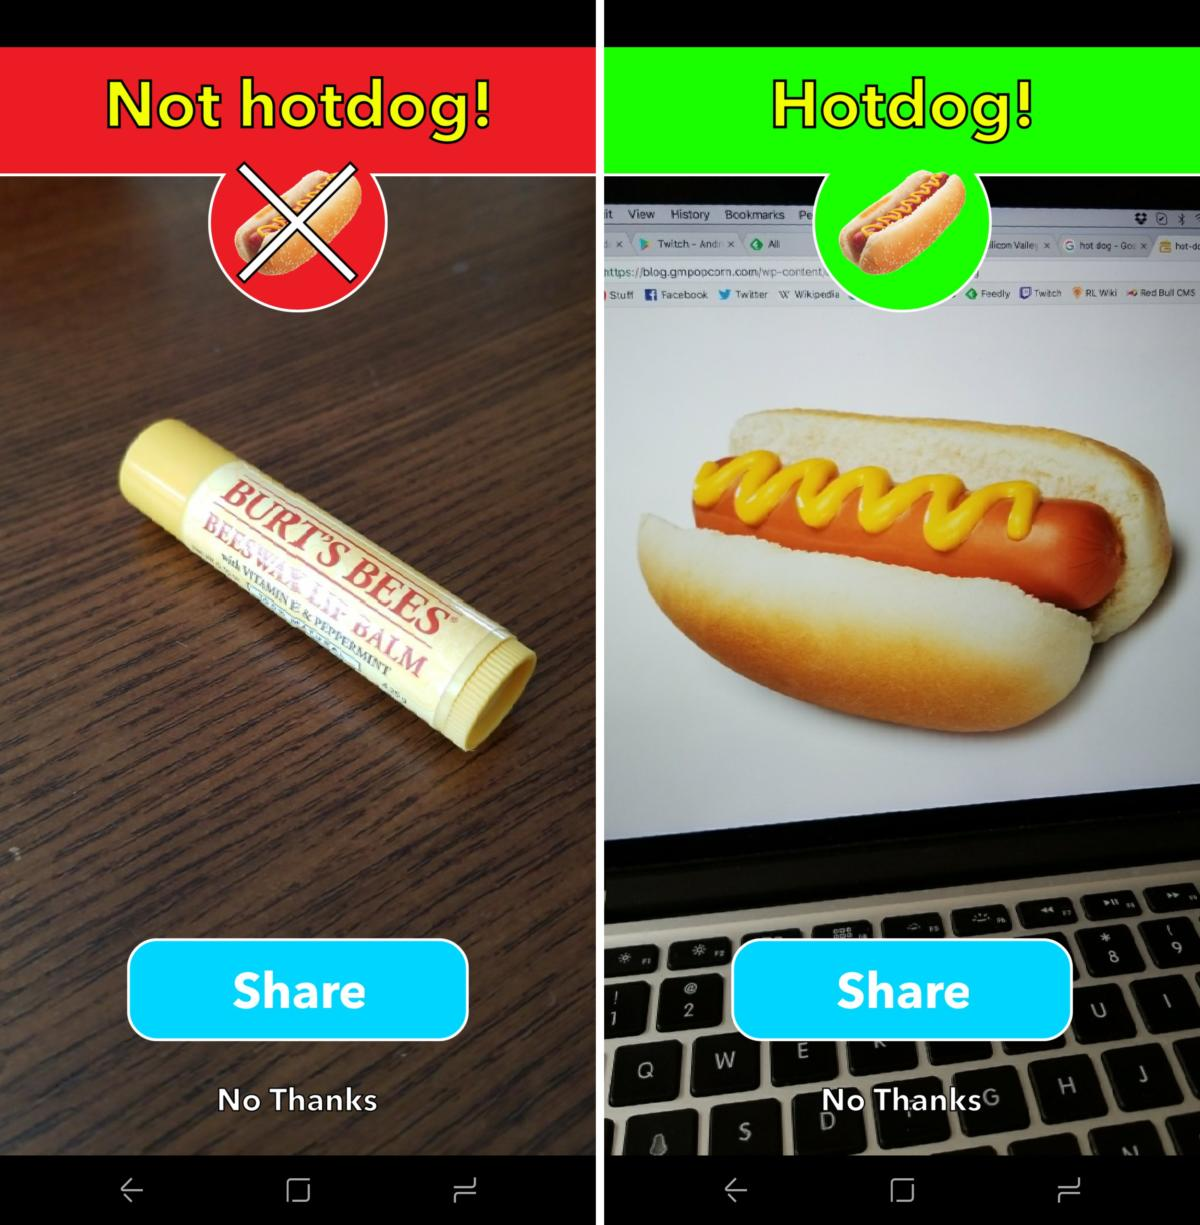

# 1. Introduction

<p style="line-height:1.75;font-size:16px">
Classification is the process of predicting the class (or group) a given observation belongs to. It is considered a <b>supervised learning</b> problem which means that the target variable (i.e label) is also given during the training phase. Examples of classification tasks: detecting spam, detecting malignant tumors in a CT, identifying dog breed in photos. 
<p style="line-height:1.75;font-size:16px">
There are many different classifiers ranging from a simple logistic regression model to a complex deep learning network. Although they vary greatly in how they work, in the end they all return a probability as their outcome and it is up to us to determine how to interpret it (more on that later). It is also worth noting that there is no silver bullet and that there isn't one model that is better than the others - it all depends on the problem you're trying to solve and the data you have. 

# 2. A Naive Example

<p style="line-height:1.75;font-size:16px">
Let's examine a simple classification problem that will address one of the most important problems we face when going to the beach: <i>is that a shark or a dolphin?</i>

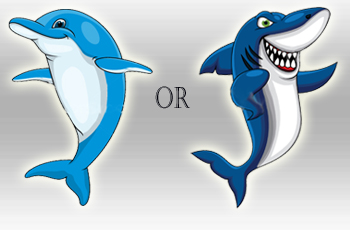

<p style="line-height:1.75;font-size:16px">
In order to make our classification, we received a dataset consisting of the animal's length and a label stating if it's a shark or a dolphin. Let's take a look at it do some exploration.

In [7]:
import pandas as pd
data = pd.read_csv('data/shark_or_dolphin.csv')
data.head()

,length,label
0,2.01,dolphin
1,2.87,dolphin
2,2.63,dolphin
3,1.67,dolphin
4,3.47,shark


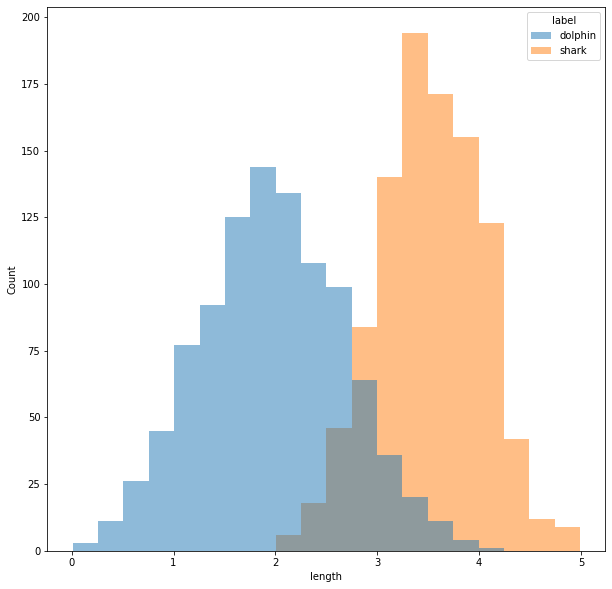

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=data, x='length', hue='label', stat='count', edgecolor=None)
plt.show()

<div style="line-height:1.75;background:#3464a2;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-question" style="font-size:40px;color:#e6f1ff;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#e6f1ff;padding:20px;border-radius:0px 0px 5px 5px">
We can see that the histograms are slightly different. How would you use that to classify the animal? Are there any issues with your approach? How would you address them? How do we know if our model is good?<br>
</p></div>

## 2.1. Solution Attempt

<p style="line-height:1.75;font-size:16px">
Let's take the point in between the distributions which is ~2.7 and create a rule such that: <b>if length $\leq$ 2.7 predict dolphin else predict shark.</b>

In [9]:
data['prediction'] = data['length'].apply(lambda x: 'dolphin' if x <= 2.7 else 'shark')
data

,length,label,prediction
0,2.01,dolphin,dolphin
1,2.87,dolphin,shark
2,2.63,dolphin,dolphin
3,1.67,dolphin,dolphin
4,3.47,shark,shark
...,...,...,...
1995,0.91,dolphin,dolphin
1996,3.74,shark,shark
1997,2.22,dolphin,dolphin
1998,3.78,shark,shark


<p style="line-height:1.75;font-size:16px">
Not bad. Although we can see that our model made a mistake, overall it looks like it did a pretty good job. Let's try to quantify it a bit more by counting our correct predictions. Let's start by looking at correct dolphin predictions.

In [10]:
correct_dolphin = sum((data['prediction'] == 'dolphin') & (data['label'] == 'dolphin'))
total_dolphin = len(data[data['label'] == 'dolphin'])
print(f'Number of correct dolphin predictions: {correct_dolphin}')
print(f'Percentage of correct dolphin predictions: {(100 * correct_dolphin/total_dolphin):.2f}%')

Number of correct dolphin predictions: 852
Percentage of correct dolphin predictions: 85.20%


<p style="line-height:1.75;font-size:16px">
Our model does pretty well. Out of all the actual dolphin records (1000) it managed to correctly identify 852 of them. Let's see how it did with sharks.

In [11]:
correct_shark = sum((data['prediction'] == 'shark') & (data['label'] == 'shark'))
total_shark = len(data[data['label'] == 'shark'])
print(f'Number of correct shark predictions: {correct_shark}')
print(f'Percentage of correct shark predictions: {(100 * correct_shark/total_shark):.2f}%')

Number of correct shark predictions: 940
Percentage of correct shark predictions: 94.00%


<p style="line-height:1.75;font-size:16px">
Even better! Out of all the actual shark records (1000) our model managed to correctly identify 940 of them. Now, let's look. at the overall performace of our model.

In [12]:
correct = sum(data['prediction'] == data['label'])
print(f'Number of correct predictions: {correct}')
print(f'Accuracy: {(correct/len(data) * 100):.1f}%')

Number of correct predictions: 1792
Accuracy: 89.6%


<p style="line-height:1.75;font-size:16px">
89.6% is pretty great accuracy (not always but more on that later) but is it enough? Imagine that you're in the ocean and you suddenly see a fin. You estimate that length of the creature attached to the fin and input it into your model which says it's a dolphin. That means that there's still a chance that it's actually a shark. Would you stay in the water?<br>
A model's usefulness is determined by the business objective. So if, for instance, our business objective is to never miss a shark we could <b>naively</b> mark all records as shark.

In [13]:
data['prediction_all_sharks'] = 'shark'

correct = sum(data['prediction_all_sharks'] == data['label'])
print(f'Number of correct predictions: {correct}')
print(f'Accuracy: {(correct/len(data) * 100):.1f}%')

Number of correct predictions: 1000
Accuracy: 50.0%


<p style="line-height:1.75;font-size:16px">
This obviously hurts our model's overall performance. Perhaps we could find a different heuristic that doesn't hurt the perfomance as much...  

<div style="line-height:1.75;background:#1e7b1e;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-pencil" style="font-size:40px;color:#c1f0c1;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#c1f0c1;padding:20px;border-radius:0px 0px 5px 5px">
Try to find a method that will never miss detecting a shark but doesn't hurt the overall performance as much as always predicting shark.
</div>

In [113]:
data['prediction_lower_threshold'] = data['length'].apply(lambda x: 'dolphin' if x <= 2 else 'shark')
data

,length,label,prediction,prediction_lower_threshold,prediction_all_sharks
0,2.01,dolphin,dolphin,shark,shark
1,2.87,dolphin,shark,shark,shark
2,2.63,dolphin,dolphin,shark,shark
3,1.67,dolphin,dolphin,dolphin,shark
4,3.47,shark,shark,shark,shark
...,...,...,...,...,...
1995,0.91,dolphin,dolphin,dolphin,shark
1996,3.74,shark,shark,shark,shark
1997,2.22,dolphin,dolphin,shark,shark
1998,3.78,shark,shark,shark,shark


In [114]:
undetected_sharks = sum((data['prediction_lower_threshold'] == 'dolphin') & (data['label'] == 'shark'))
print(f'Number of undetected sharks: {undetected_sharks}')

Number of undetected sharks: 0


<p style="line-height:1.75;font-size:16px">
Great! Our model will never miss in detecting a shark, however it will predict shark for many dolphin sightings as well. This might have an undesired effect as people might stop trusting our model (the boy who cried wolf...). Let's measure how this new threshold affected our model.

In [115]:
correct = sum(data['prediction_lower_threshold'] == data['label'])
print(f'Number of correct predictions: {correct}')
print(f'Accuracy: {(correct/len(data) * 100):.1f}%')

Number of correct predictions: 1523
Accuracy: 76.1%


<div style="line-height:1.75;background:#3464a2;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-question" style="font-size:40px;color:#e6f1ff;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#e6f1ff;padding:20px;border-radius:0px 0px 5px 5px">
We can clearly see that this change reduced our model's accuracy - which model is better?<br>
</p></div>

<p style="line-height:1.75;font-size:16px">
We've seen that accuracy can give us some sense of a model's performance but sometimes it's just not enough. Let's look at another shark or dolphin dataset to help clarify this point.

In [86]:
data_new = pd.read_csv('shark_or_dolphin_2.csv')
data_new

,length,label
0,2.23,dolphin
1,2.04,dolphin
2,3.41,shark
3,1.43,dolphin
4,1.57,dolphin
...,...,...
1015,1.87,dolphin
1016,1.96,dolphin
1017,1.88,dolphin
1018,0.46,dolphin


<p style="line-height:1.75;font-size:16px">
Using our original threshold of 2.7, let's run the same calculations we ran on the previous dataset.

In [107]:
correct_dolphin = sum((data_new['prediction'] == 'dolphin') & (data_new['label'] == 'dolphin'))
total_dolphin = len(data_new[data_new['label'] == 'dolphin'])
print(f'Number of correct dolphin predictions: {correct_dolphin}')
print(f'Percentage of correct dolphin predictions: {(100 * correct_dolphin/total_dolphin):.2f}%')

Number of correct dolphin predictions: 852
Percentage of correct dolphin predictions: 85.20%


In [108]:
correct_shark = sum((data_new['prediction'] == 'shark') & (data_new['label'] == 'shark'))
total_shark = len(data_new[data_new['label'] == 'shark'])
print(f'Number of correct shark predictions: {correct_shark}')
print(f'Percentage of correct shark predictions: {(100 * correct_shark/total_shark):.2f}%')

Number of correct shark predictions: 20
Percentage of correct shark predictions: 100.00%


In [116]:
correct = sum(data_new['prediction'] == data_new['label'])
print(f'Number of correct predictions: {correct}')
print(f'Accuracy: {(correct/len(data_new) * 100):.1f}%')

Number of correct predictions: 872
Accuracy: 85.5%


<p style="line-height:1.75;font-size:16px">
There's not much of a difference in the overall performance of this model compared to the previous one - it performs slightly worse. There is a way though, to get a much higher accuracy - do you know what it is?

In [117]:
data_new['prediction_all_dolphins'] = 'dolphin'

correct = sum(data_new['prediction_all_dolphins'] == data_new['label'])
print(f'Number of correct predictions: {correct}')
print(f'Accuracy: {(correct/len(data_new) * 100):.1f}%')

Number of correct predictions: 1000
Accuracy: 98.0%


<p style="line-height:1.75;font-size:16px">
Since there are much more dolphin records then there are shark records in this dataset (1000 and 20 respectively), just prediciting dolphin all the time yields a very high accuracy. A dataset that has one (or more) predominant class is referred to as an <b>imbalanced dataset</b>. For many machine learning models that rely on classes being balanced, we usually need to pre-process the data or run with a certain configuration that addresses this issue (more on that later).

<div style="line-height:1.75;background:#f6e609;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-lightbulb-o" style="font-size: 50px;color:#ffffcc;"></i>
</div>
<div>
<p style="line-height:1.75;background:#ffffcc;padding:20px;border-radius:0px 0px 5px 5px">
<span style="font-size:14px"><b>Imbalanced Data</b></span><br>
The topic of imbalanced data comes up a lot for a good reason. It is a real world issue that data scientists face on a daily basis because for tasks we're going to get imbalanced data. For instance, think about a classification algorithm that needs to detect if a person has covid-19 or not based on certain symptoms. The vast majority of people are likely to be healthy and only a small percentage will actually have covid-19. That is class imbalance that will require our attention before we can train an effective model (recall the model predicting dolphin all the time). We're going to talk about some of the techniques for dealing with imbalanced data but if you're interested <a href=https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset>this post</a> explains the topic pretty well. 
</p></div>

# 3. Evaluation Metrics

<p style="line-height:1.75;font-size:16px">
We've seen that accuracy can be misleading in certain cases. Let's look at some other useful metrics that can help us gain insight into our model's performance.

## 3.1. Confusion Matrix

<p style="line-height:1.75;font-size:16px">
The confusion matrix, regardless of its name, is actually a pretty straightforward toolto use which is also helps us calculate other metrics as well. If takes the form of a table where each cell is a combination of the model's predicted values vs. the actual (ground truth) values. It may sound complicated but let's look at an example to make this clearer.

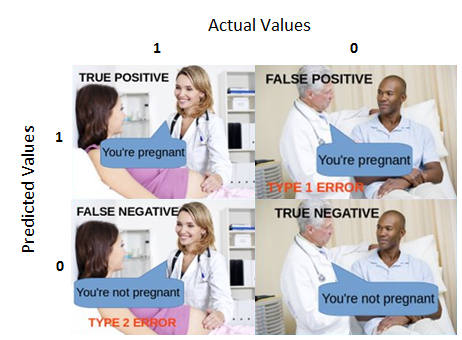

<p style="line-height:1.75;font-size:16px">
More formally, the confusion matrix looks like the image below where the cells contain the number of records for each predicted value/actual value combination.

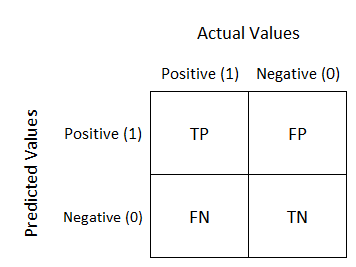

<div style="line-height:1.75;background:#f6e609;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-lightbulb-o" style="font-size: 50px;color:#ffffcc;"></i>
</div>
<div>
<p style="line-height:1.75;background:#ffffcc;padding:20px;border-radius:0px 0px 5px 5px">
<span style="font-size:14px"><b>Multi-Class Confusion Matrix</b></span><br>
We've only looked at the confusion matrix of a simple binary classification model but the same principals hold true for a multi-class model as well. It's beyond our scope but you can read about it <a href=https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2>here</a> if you're interested in learning how it works. 
</p></div>

<p style="line-height:1.75;font-size:16px">
Let's build a confusion matrix for the dolphin/shark predicting model with a threshold of 2.7. For easier understanding, let's assume that our objective is to predict 'dolphin' or 'not dolphin'. 

In [17]:
from sklearn.metrics import confusion_matrix

labels = ['dolphin', 'not dolphin']
data = pd.read_csv('data/shark_or_dolphin.csv')
data['label'] = data['label'].apply(lambda x: 'dolphin' if x == 'dolphin' else 'not dolphin')
data['prediction'] = data['length'].apply(lambda x: 'dolphin' if x <= 2.7 else 'not dolphin')

cm = confusion_matrix(y_true=data['label'], y_pred=data['prediction'], labels=labels)
df = pd.DataFrame(cm, index=labels, columns=labels)
df

,dolphin,not dolphin
dolphin,852,148
not dolphin,60,940


<div style="line-height:1.75;background:#990000;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px">
<i class="fa fa-exclamation-triangle" style="font-size:40px;color:#ffb3b3;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#ffb3b3;padding:20px;border-radius:0px 0px 5px 5px">
Note that `sklearn` returned the confusion matrix in a different order than the images above. There is no 'correct' way to write the confusion matrix but make sure you are consistent and that you're reading it correctly (especially when looking at someone else's output).
</p></div>

<p style="line-height:1.75;font-size:16px">
So here are the current values we got:
<p style="line-height:1.5;font-size:16px">
- True Positives (TP) = 852<br>
- False Negatives(FN) = 148<br>
- False Positives (FP) = 60<br>
- True Negatives (TN) = 940<br>
</p>

<p style="line-height:1.5;font-size:16px">
Now, since the particular dolphin species we're interested in is endangered, we don't want to miss detecting a single one - in other words we want a false negative value of 0. Let's try to change our threshold and see if we can do it.

In [136]:
data['strict_prediction'] = data['length'].apply(lambda x: 'dolphin' if x <= 4.2 else 'not dolphin')

cm = confusion_matrix(y_true=data['label'], y_pred=data['strict_prediction'], labels=labels)
df = pd.DataFrame(cm, index=labels, columns=labels)
df

,dolphin,not dolphin
dolphin,1000,0
not dolphin,923,77


<p style="line-height:1.5;font-size:16px">
Great! We've managed to lower our false negative value to 0. We can see that now our false positive value is very hight (923) meaning that we'll predict 'dolphin' for many cases that aren't really a dolphin. For our purpose that's fine but as we mentioned earlier this is often a business/product descision. What we need to remember is that there is almost always a tradeoff - you reduce one type of error but increase another type.

## 3.2. Accuracy

<p style="line-height:1.75;font-size:16px">
We've already seen accuracy but for the sake of completeness let's give it a proper definition and see how calculate it using `sklearn` and how it's related to the confusion matrix.
<p style="line-height:1.75;font-size:16px">
We know that accuracy is the fraction of correct predictions our model made:
<center><h3>
$Accuracy=\frac{Number~Of~Correct~Predictions}{Total~Number~Of~Predictions}$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
But now that we've seen how to generate a confusion matrix we could also write it as:
<center><h3>
$Accuracy=\frac{TP~+~TN}{TP~+~TN~+~FP~+~FN}$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
So for our example above we could simply use the cofusion matrix to calculate the accuracy by plugging in the numbers:
<center><h3>
$Accuracy=\frac{TP~+~TN}{TP~+~TN~+~FP~+~FN}=\frac{852~+~940}{852~+~940~+~60~+~148}=0.896$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
Obviously we don't have to do this by hand as `sklearn` does this for us.

In [138]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true=data['label'], y_pred=data['prediction'])
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.896


## 3.3. Precision and Recall

<p style="line-height:1.75;font-size:16px">
<b>Precision</b><br>
What proportion of positive identifications was actually correct? (how many of our 'dolphin' predictions were actually dolphins?)
<center><h3>
$Precision=\frac{TP}{TP~+~FP}$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
And in our example:
<center><h3>
$Precision=\frac{852}{852~+~60}=0.934$
</h3>
</center>

<p style="line-height:1.75;font-size:16px">
<b>Recall</b><br>
What proportion of actual positives was identified correctly? (how many dolphins out of all the dolphins in the data did we manange to identify?)
<center><h3>
$Recall=\frac{TP}{TP~+~FN}$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
And in our example:
<center><h3>
$Recall=\frac{852}{852~+~148}=0.852$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
As always, we can use `sklearn` to calculate both precision and recall. Note that we need to tell the method what is our positive label (`pos_label`) so it will be able to calculate these metrics.

In [164]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_true=data['label'], y_pred=data['prediction'], pos_label='dolphin')
print(f'Precision: {precision}')

recall = recall_score(y_true=data['label'], y_pred=data['prediction'], pos_label='dolphin')
print(f'Recall: {recall}')

Precision: 0.9342105263157895
Recall: 0.852


<p style="line-height:1.75;font-size:16px">
It's important to note that precision in recall are often in tension - improving one typically reduces the other and vice versa. Let's solidify this concept by doing a small exercise.

<div style="line-height:1.75;background:#1e7b1e;padding-left:20px;padding-top:5px;padding-bottom:5px;border-radius:5px 5px 0px 0px"><i class="fa fa-pencil" style="font-size:40px;color:#c1f0c1;"></i>
</div>
<div>
<p style="line-height:1.75;font-size:16px;background:#c1f0c1;padding:20px;border-radius:0px 0px 5px 5px">
Using the dolphin/shark dataset try the following:<br>
1. Find a threshold that yields a precision of 1. What is the recall at that threshold?<br>
2. Find a threshold that yields a recall of 1. What is the precision at that threshold?
</p>
</div>

## 3.4. F1 Score

<p style="line-height:1.75;font-size:16px">
Formally, the F1 score is the harmonic mean of the precision and recall. It is a way to combine precision and recall into a single metric and it is often used when evaluating classification models.
<center><h3>
$F1=2\cdot\frac{precision~\cdot~recall}{precision~+~recall}$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
And in our example:
<center><h3>
$F1=2\cdot\frac{0.934~\cdot~0.852}{0.934~+~0.852}=0.891$
</h3>
</center>
<p style="line-height:1.75;font-size:16px">
And finally, using `sklearn`:

In [163]:
from sklearn.metrics import f1_score

f1 = f1_score(y_true=data['label'], y_pred=data['prediction'], pos_label='dolphin')
print(f'F1: {f1}')

F1: 0.891213389121339
